## MULTIPLE LINEAR REGRESSION

### Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


### Dataset Description:

The dataset consists of the following variables:
e in EUROs


Age: Age in years

KM: Accumulated Kilometers on odomet

FuelType: Fuel Type (Petrol, Diesel, CNG)

HP: Horse Power

Automatic: Automatic ( (Yes=1, No=0)

CC: Cylinder Volume in cubic centimeters


Doors: Number of doors

Weight: Weight in Kilograms

Quarterly_Tax: 

Price: Offer Price in EUROs


## Taskes:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
del.



2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset

.
5.Apply Lasso and Ridge methods on the model.


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import statsmodels.formula.api as smf


In [92]:

import warnings
warnings.filterwarnings('ignore')

In [93]:
data = pd.read_csv('ToyotaCorolla - MLR.csv')

In [94]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


## EDA

## Descriptive Analysis


In [95]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


###  Checking for Data type

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


### Observation: all the data types are correct .
Note:Fuel_Typee is a Categorical feature we need to do some encoding or convert it into numerical values by putting dummy values


## Renaming the columns name 

In [97]:
data1=data.rename({'Age_08_04':'Age','cc':'CC','Fuel_Type':'FT'},axis=1)
data1.head()

,Price,Age,KM,FT,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


## Checking for missing values

In [8]:
data1.isnull().sum()

Price        0
Age          0
KM           0
FT           0
HP           0
Automatic    0
CC           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

### Observation: Notice there are no missing  values in the dataset

## Visualizing Missing Values

<Axes: >

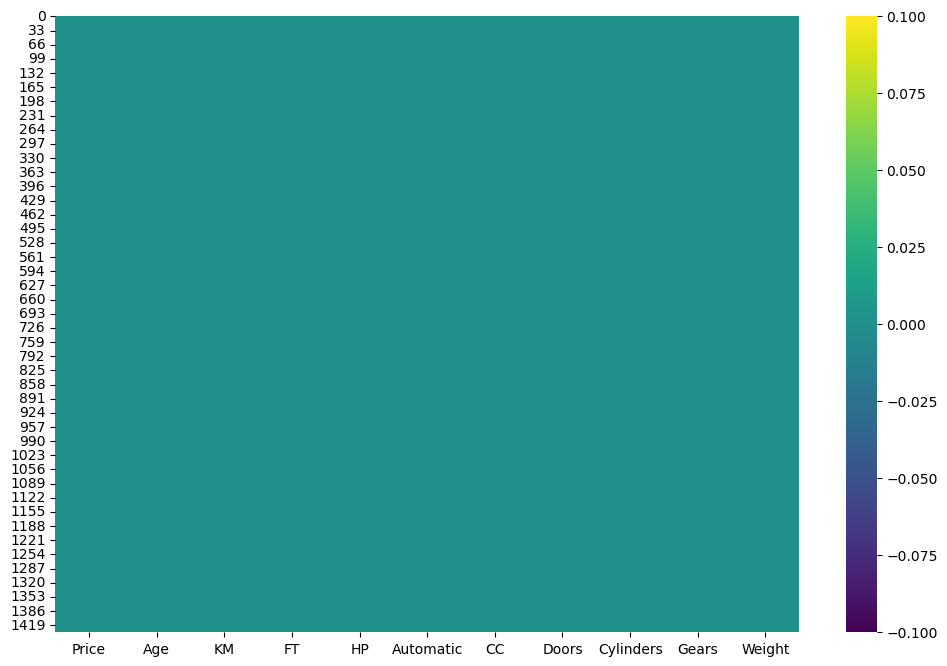

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(data1.isnull(),cmap='viridis')

### Observation: No missing Values are present in the data set

## Checking for Duplicated Values

In [10]:
data1[data1.duplicated()]

,Price,Age,KM,FT,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [11]:
data1[data1.duplicated()].shape

(1, 11)

In [12]:
data1=data1.drop_duplicates().reset_index(drop=True)
data1[data1.duplicated()]

,Price,Age,KM,FT,HP,Automatic,CC,Doors,Cylinders,Gears,Weight


### Observation: There are duplicated values in the dataset
Hence, we dropped those values

## Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables

In [13]:
discrete_feature=[feature for feature in data1.columns if len(data1[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))
continuous_feature=[feature for feature in data1.columns if data1[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Discrete Variables Count: 7
Continuous Feature Count 4


## Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plots

In [14]:
import pylab
def plot_data1(data1,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data1[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data1[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

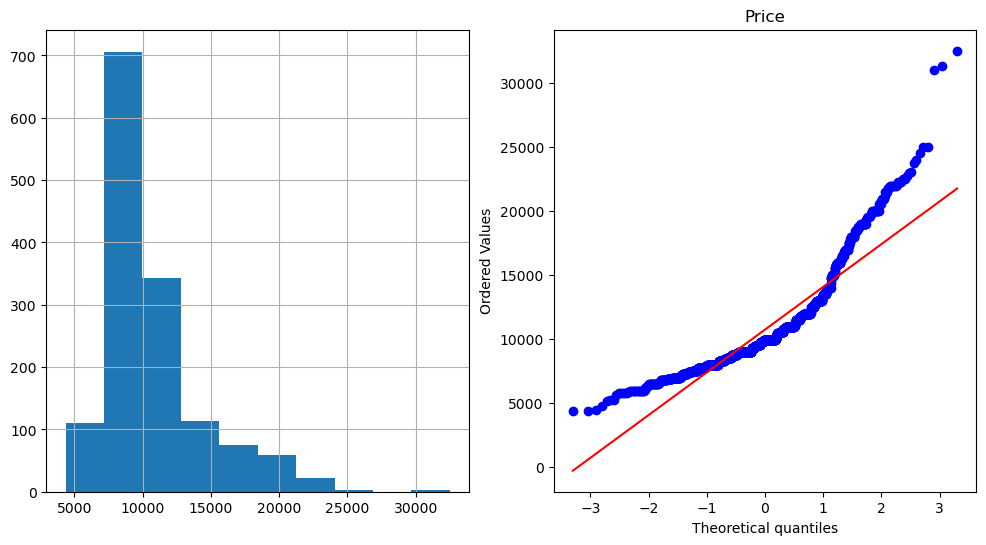

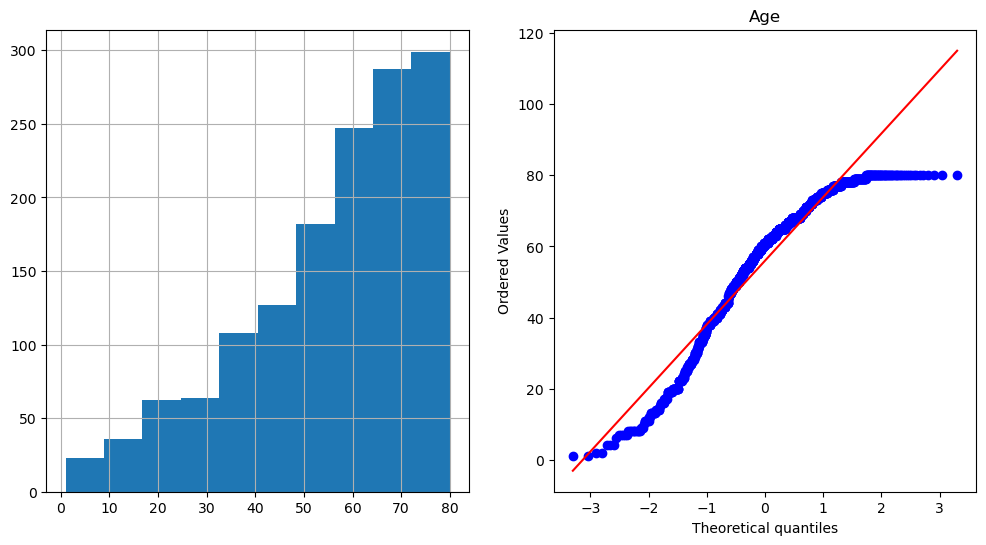

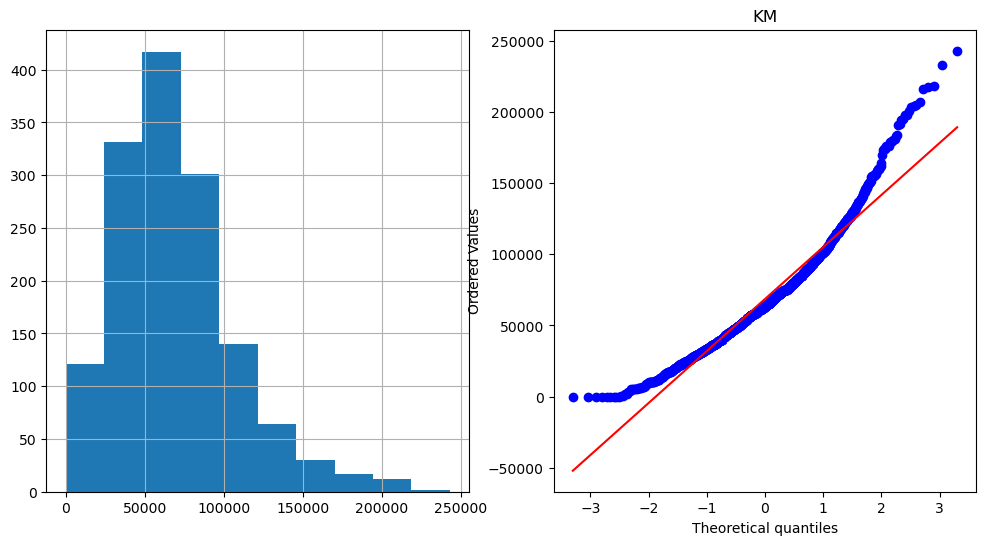

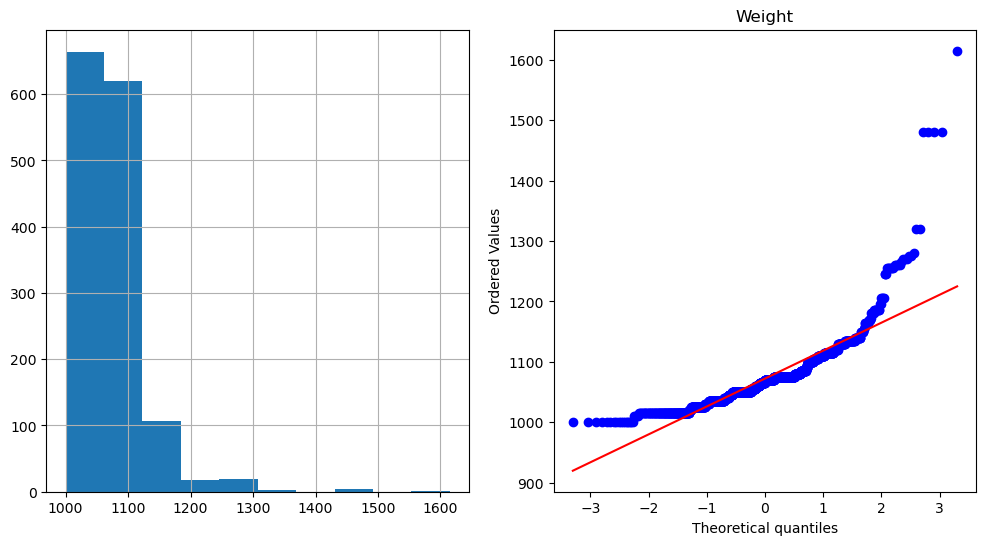

In [15]:
plot_data1(data1,'Price')
plt.title('Price')
plot_data1(data1,'Age')
plt.title('Age')
plot_data1(data1,'KM')
plt.title('KM')
plot_data1(data1,'Weight')
plt.title('Weight')


## Visualizing the Relation between each independent Feature with respect to the Dependent Feature

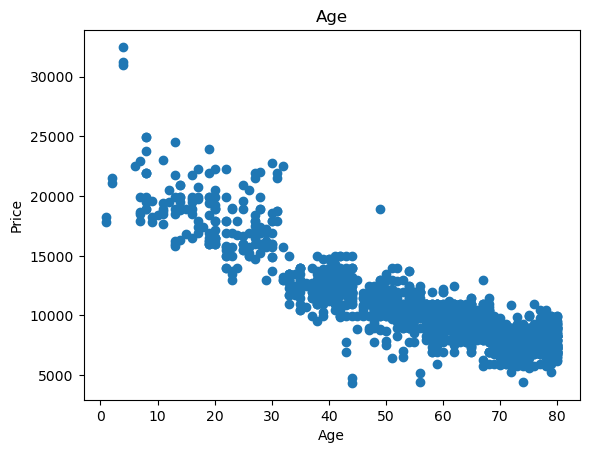

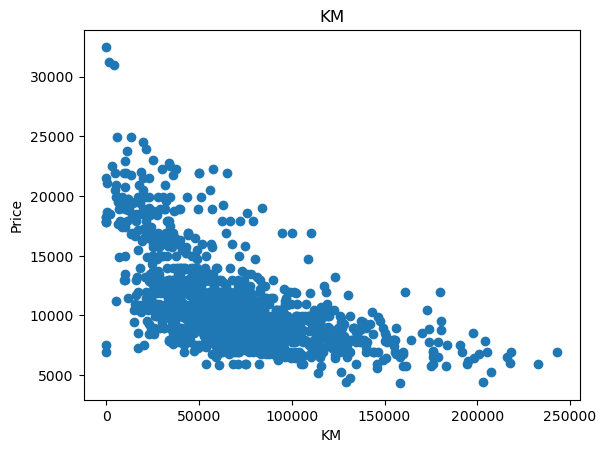

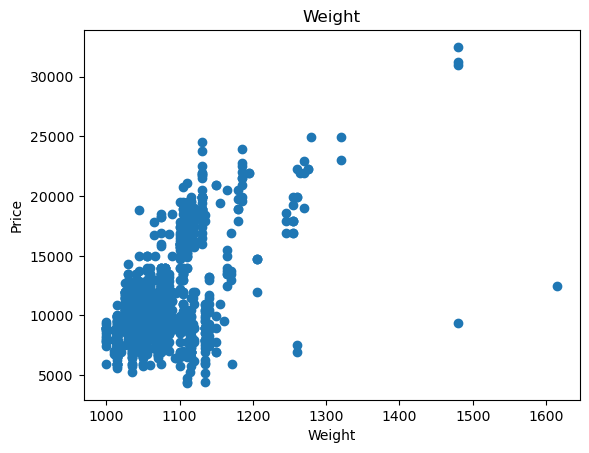

In [16]:
for feature in continuous_feature:
    if feature!="Price":
        df=data1.copy()         
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()


### Observation: Age feature has a good linear relation with Price 

## analyze the relationship between the discrete variables and Price

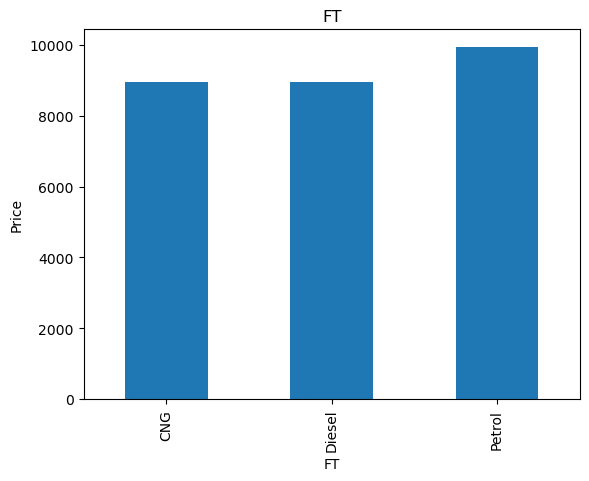

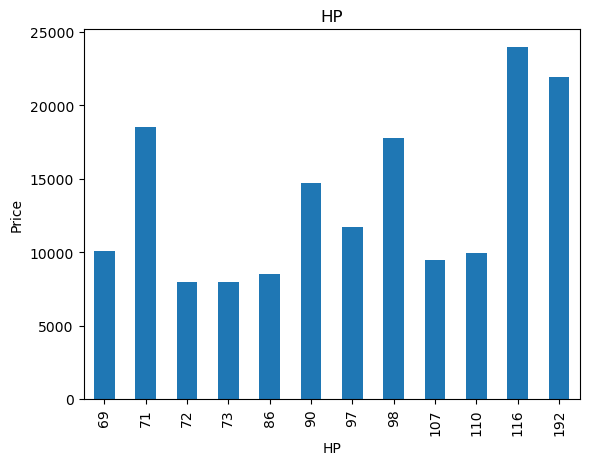

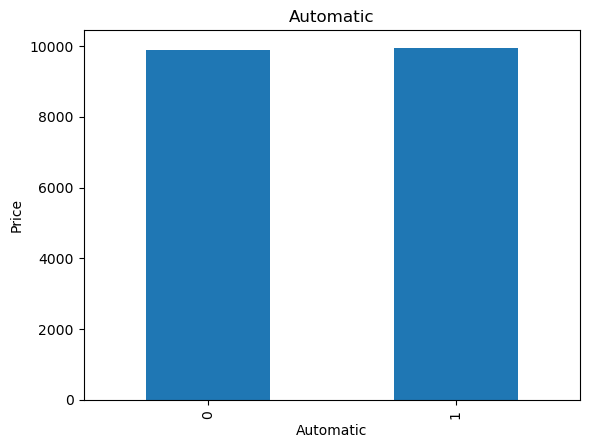

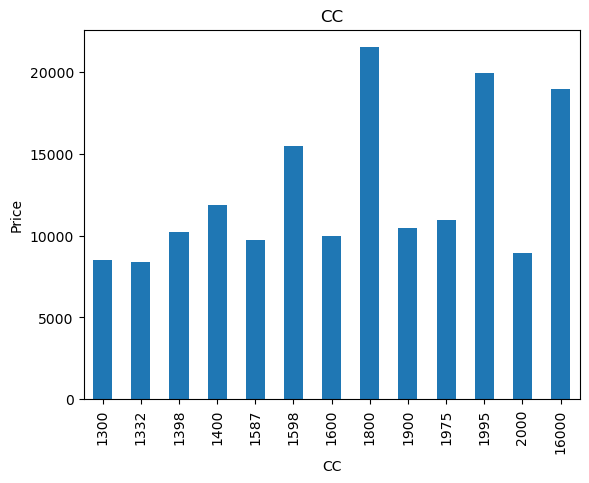

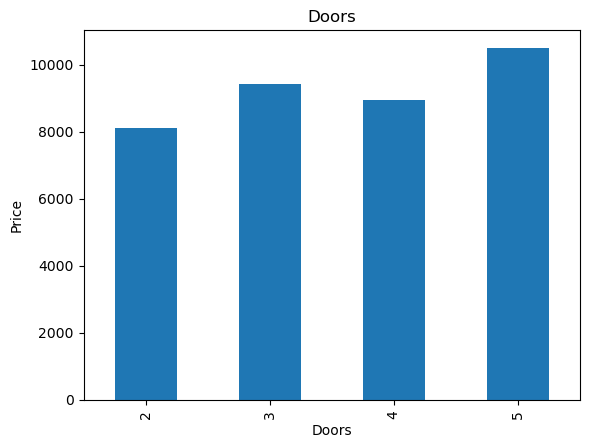

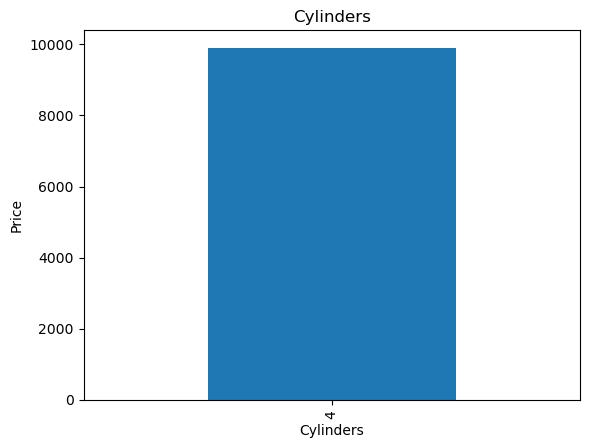

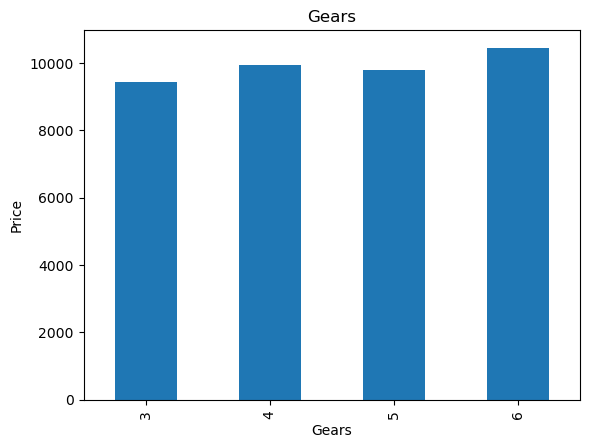

In [17]:
for feature in discrete_feature:
    df=data1.copy()
    df.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()


## Visualizing Continuous Datatype for Outlier Detection

In [18]:
continuous_feature

['Price', 'Age', 'KM', 'Weight']

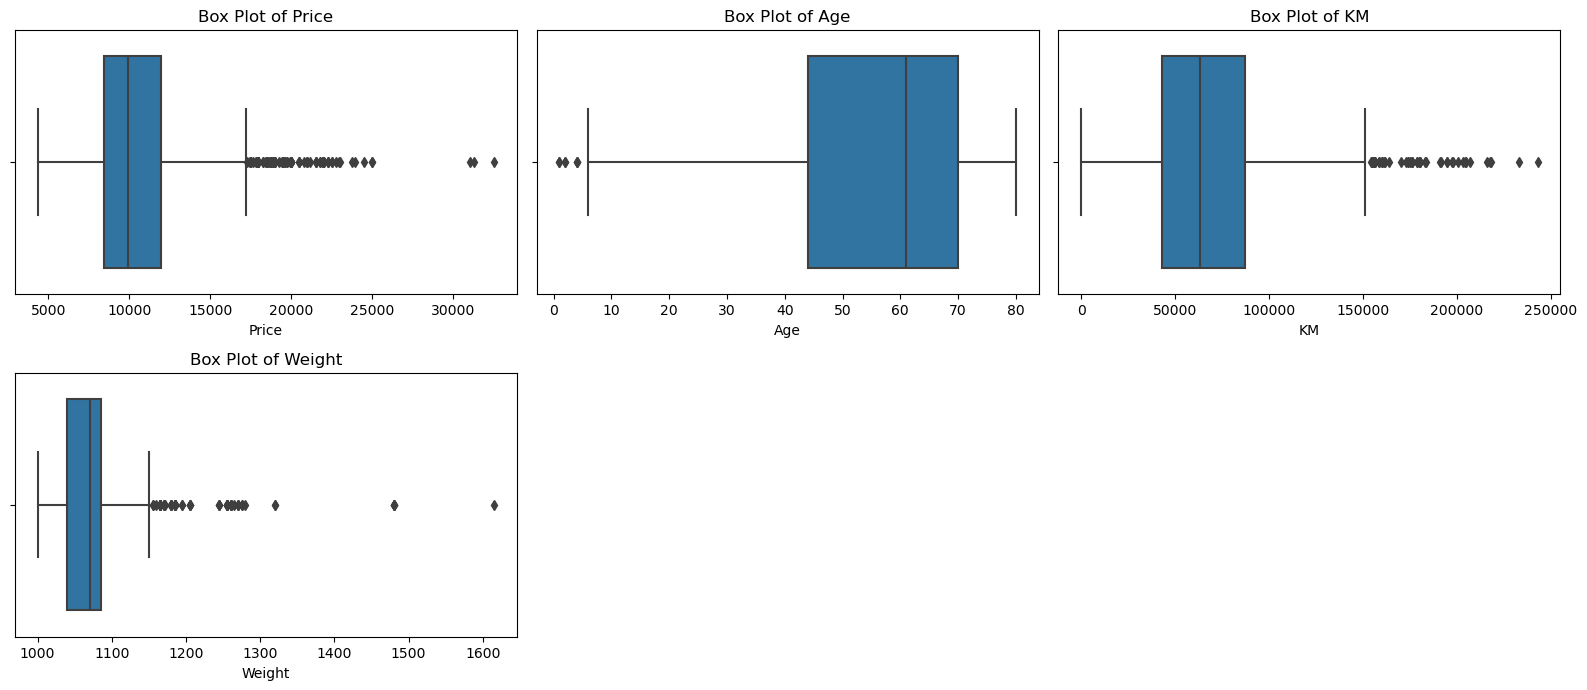

In [19]:
plt.figure(figsize=(16, 10))
for i, var in enumerate(continuous_feature, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data1[var])
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

### Observation: A significant amount of outliers are present in each continuous feature

We can't simply remove the outliers that would mean loss of information.
We need to try different types of transformation or imputation and select the one with the best results

## for treating the outliers we are using  Median Imputation to handle Outlier in continuous features

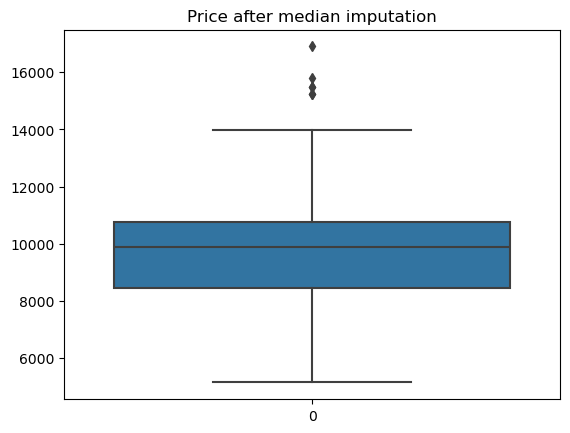

In [20]:
df1=data1.copy()
for i in data1['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()

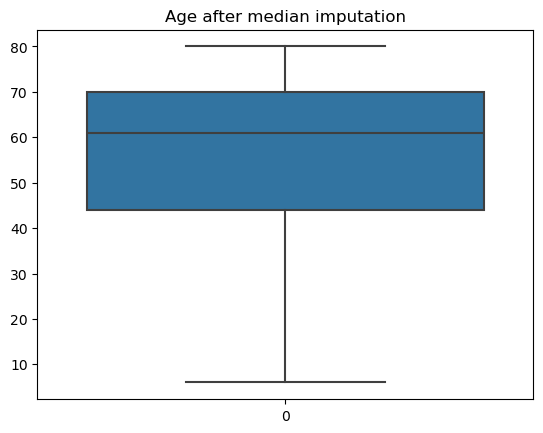

In [21]:
for i in data1['Age']:
    q1 = np.quantile(df1.Age,0.25)
    q3 = np.quantile(df1.Age,0.75)
    med = np.median(df1.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age'] = df1['Age'].replace(i, np.median(df1['Age']))
sns.boxplot(df1['Age'])
plt.title('Age after median imputation')
plt.show()

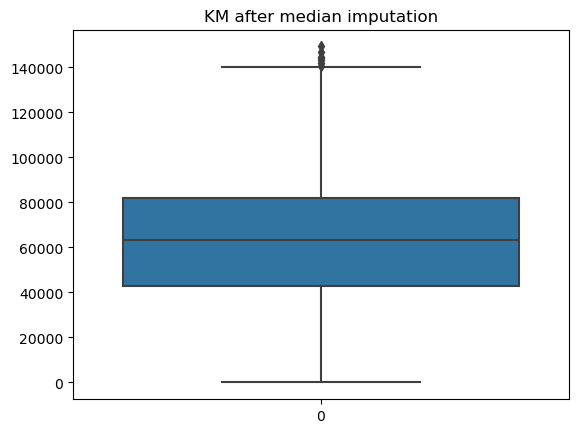

In [22]:
for i in data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()

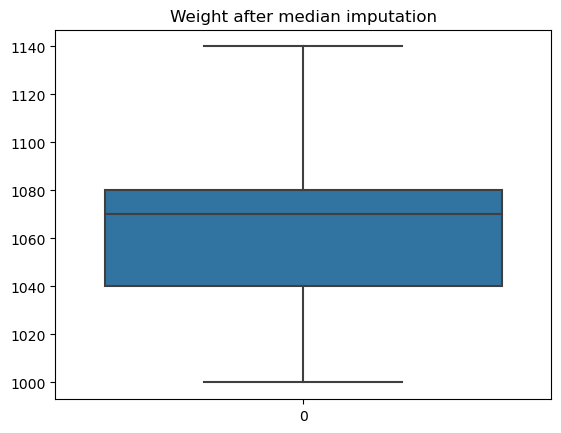

In [23]:
for i in data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

## Preprocessing the Data

In [98]:
data1.columns

Index(['Price', 'Age', 'KM', 'FT', 'HP', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [99]:
##Convert Categorical columns into numerical columns
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
data1['FT'] = LabelEncoder.fit_transform(data1['FT'])


In [100]:
data1

,Price,Age,KM,FT,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


## Raw Data Model


In [27]:
data1.columns


Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors', 'Cylinders',
       'Gears', 'Weight', 'FT_CNG', 'FT_Diesel', 'FT_Petrol'],
      dtype='object')

In [28]:
 raw_data_model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears++Doors+Cylinders+Automatic", data = data1).fit()
# Finding rsquared values
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1116.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        15:27:25   Log-Likelihood:                -12368.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -410.5182     77.575     -5.292      0.000    -562.692    -258.344
Age         -123.1434      2.635    -46.743      0.000    -128.311    -117.975
KM            -0.0194      0.001    -15.816      0.000      -0.022      -0.017
Weight        18.4560      0.874     21.107      0.000      16.741      20.171
HP            28.4736      2.612     10.901      0.000      23.350      33.598
CC            -0.0991      0.090     -1.106      0.269      -0.275       0.077
Gears        674.4324    198.102      3.404      0.001     285.829    1063.035
Doors         -3.0516     40.012     -0.076      0.939     -81.540      75.436
Cylinders  -1642.0729    310.302     -5.292      0.000   -2250.770   -1033.376
Automatic    381.5559    158.204      2.412      0.016      71.219     691.893
==============================================================================
Omnibus:                      193.764   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1545.518
Skew:                          -0.349   Prob(JB):                         0.00
Kurtosis:                       8.036   Cond. No.                     5.28e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.15e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## correlation

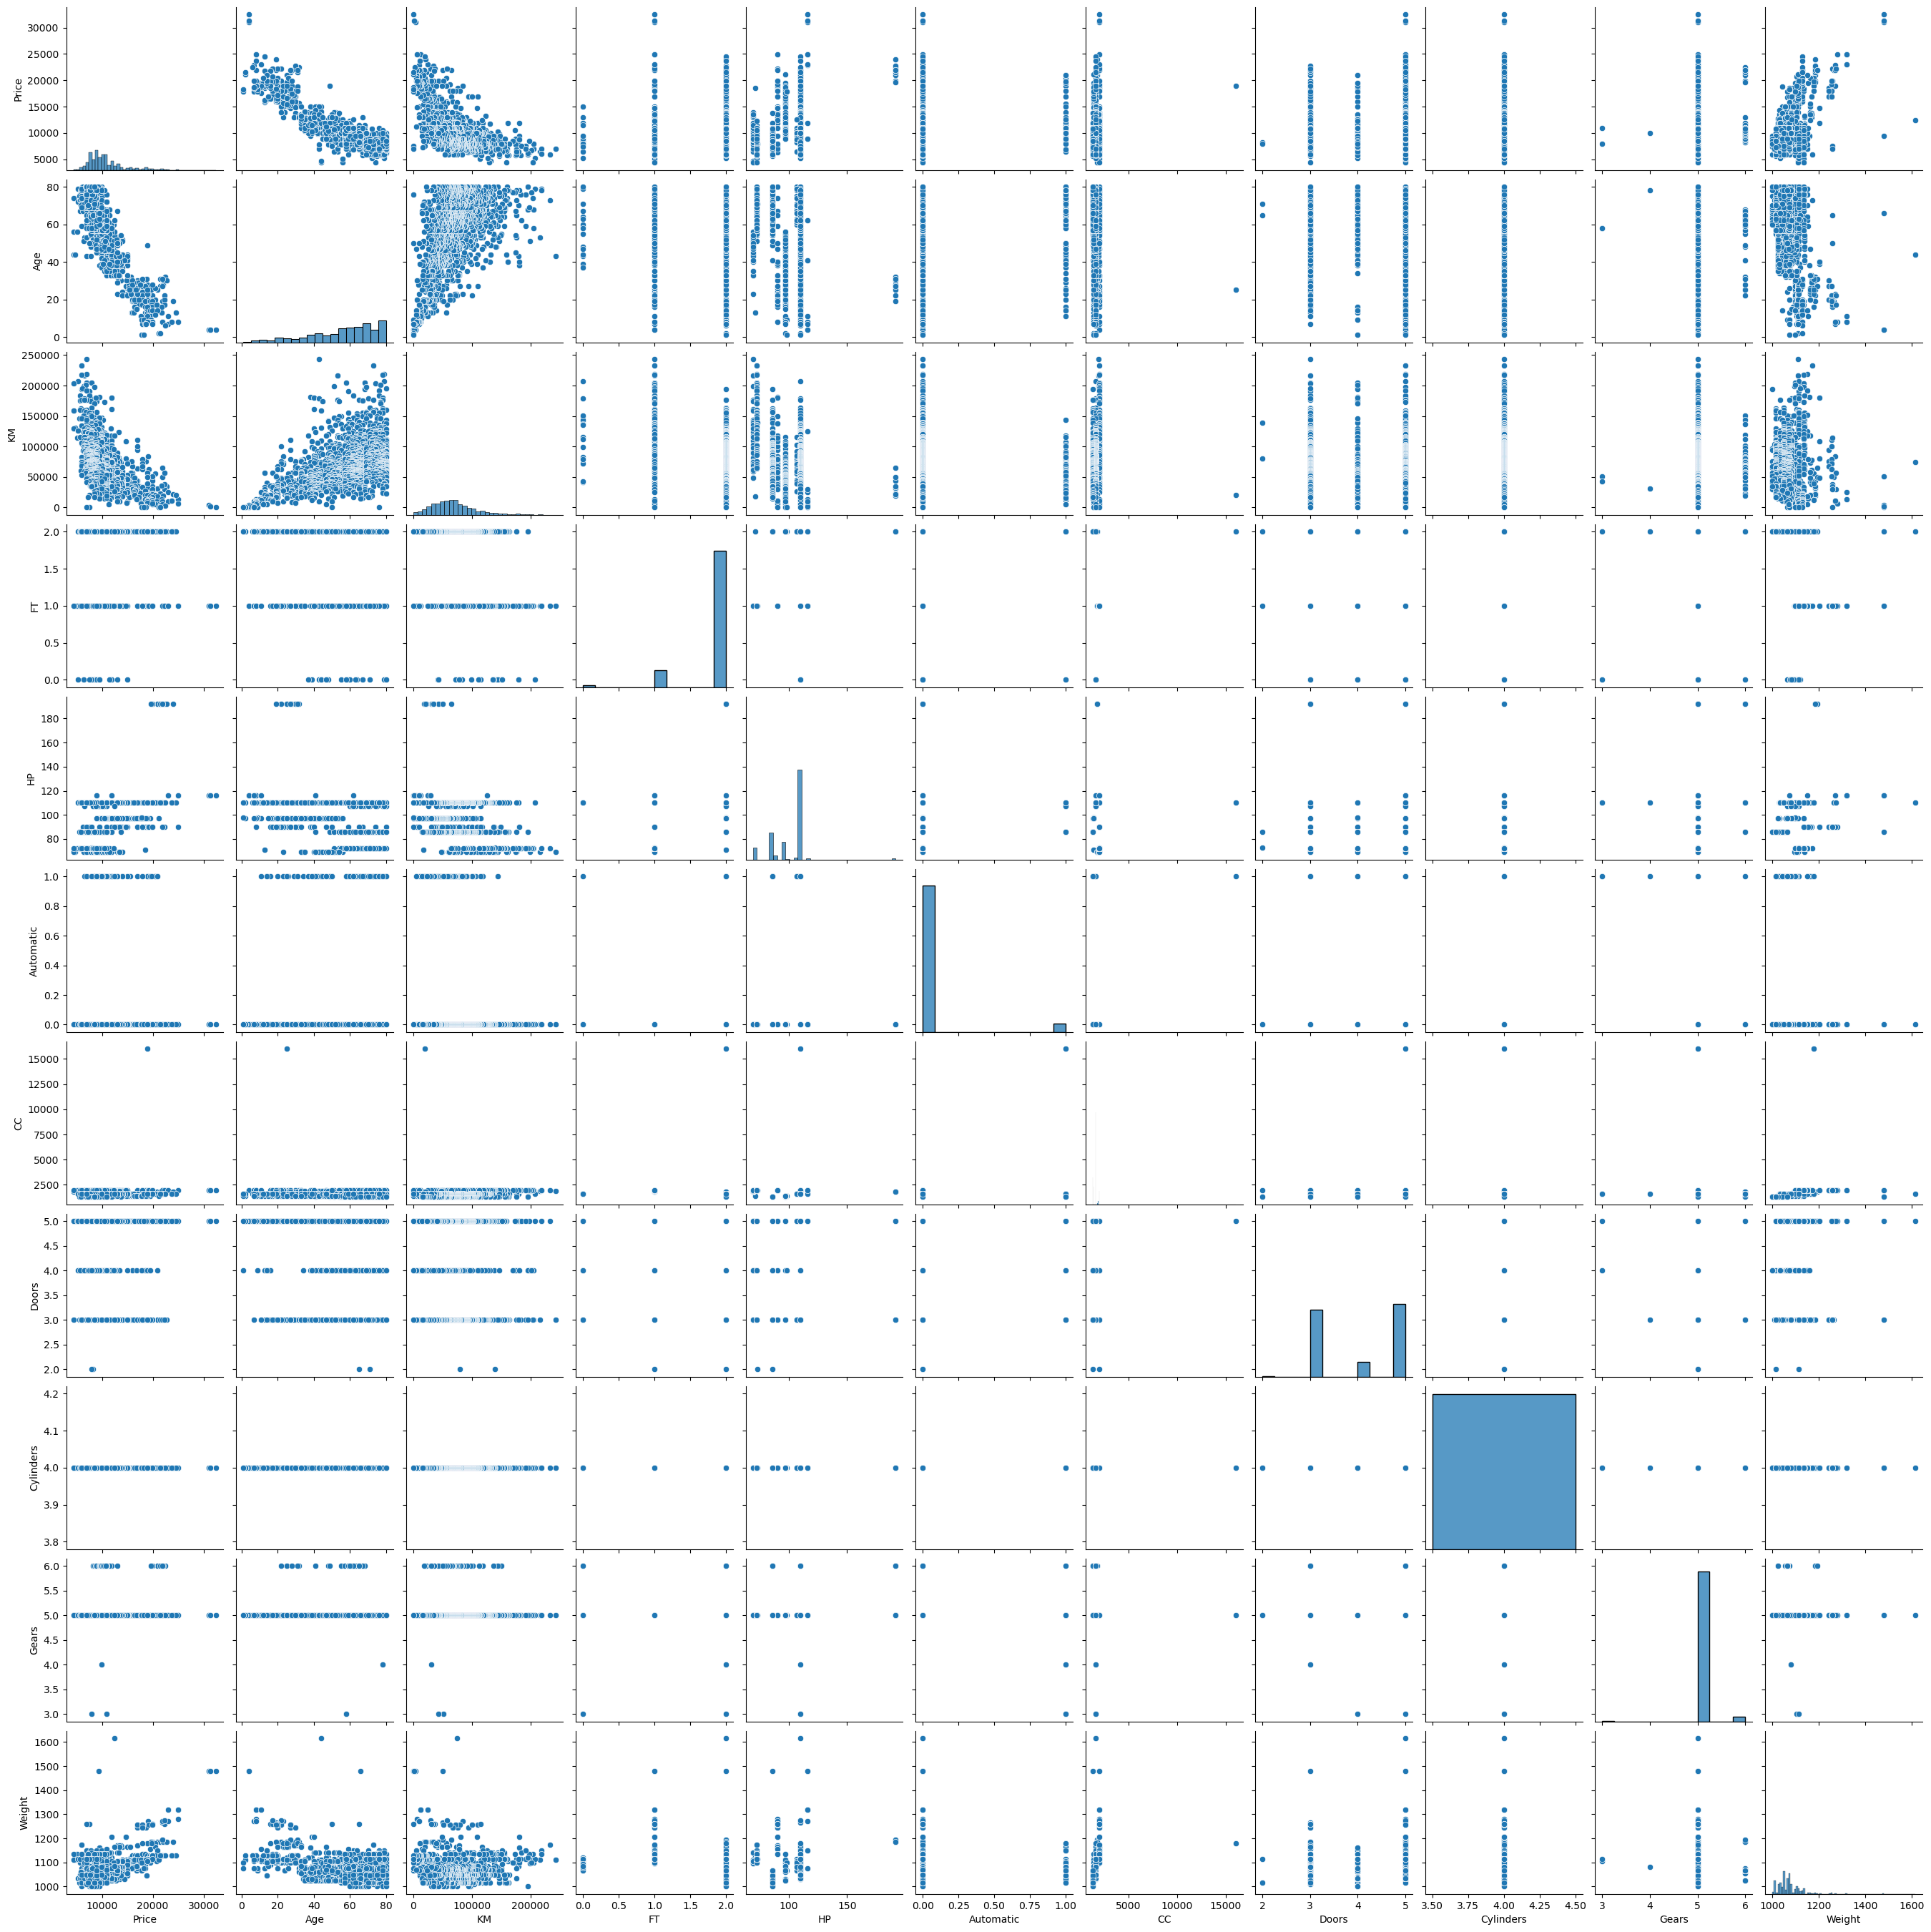

In [101]:
sns.pairplot(data=data1)

In [102]:
data1.corr()

,Price,Age,KM,FT,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
FT,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
CC,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


<Axes: >

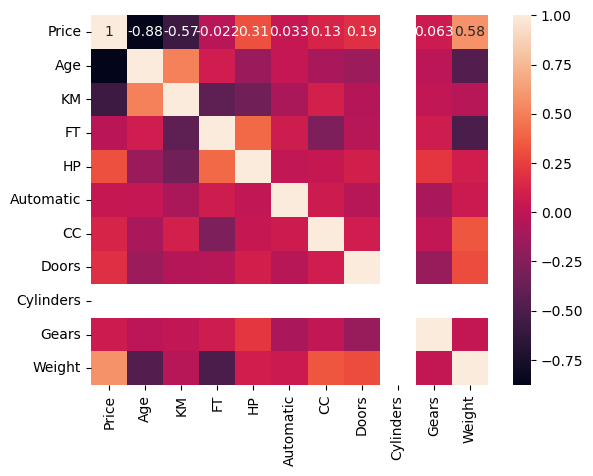

In [103]:
sns.heatmap(data1.corr(),annot=True)

## Assumption of Muliple Liner Regression

## 1 Assumption of MLR
### feature and target must have correlation

## # testing all feature  individually with target

In [104]:
def model_check(string,data1):
    x = smf.ols(string,data=data1).fit()
    return(x.summary())

In [105]:
model_check('Price~Age',data1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        16:02:45   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
model_check('Price~KM',data1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Fri, 17 May 2024   Prob (F-statistic):          1.76e-124
Time:                        16:02:45   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
model_check('Price~HP',data1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Fri, 17 May 2024   Prob (F-statistic):           1.93e-34
Time:                        16:02:45   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
HP            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
model_check('Price~Automatic',data1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.571
Date:                Fri, 17 May 2024   Prob (F-statistic):              0.210
Time:                        16:02:45   Log-Likelihood:                -13806.
No. Observations:                1436   AIC:                         2.762e+04
Df Residuals:                    1434   BIC:                         2.763e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.07e+04     98.475    108.674      0.000    1.05e+04    1.09e+04
Automatic    522.9333    417.214      1.253      0.210    -295.483    1341.349
==============================================================================
Omnibus:                      486.379   Durbin-Watson:                   0.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1531.681
Skew:                           1.705   Prob(JB):                         0.00
Kurtosis:                       6.738   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
model_check('Price~CC',data1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Fri, 17 May 2024   Prob (F-statistic):           1.55e-06
Time:                        16:02:45   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
CC             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
model_check('Price~Doors',data1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Fri, 17 May 2024   Prob (F-statistic):           1.46e-12
Time:                        16:02:46   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
model_check('Price~Cylinders',data1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 17 May 2024   Prob (F-statistic):                nan
Time:                        16:02:46   Log-Likelihood:                -13807.
No. Observations:                1436   AIC:                         2.762e+04
Df Residuals:                    1435   BIC:                         2.762e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    631.2250      5.630    112.116      0.000     620.181     642.269
Cylinders   2524.8999     22.520    112.116      0.000    2480.723    2569.076
==============================================================================
Omnibus:                      485.138   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1521.653
Skew:                           1.702   Prob(JB):                         0.00
Kurtosis:                       6.721   Cond. No.                     2.56e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [112]:
model_check('Price~Gears',data1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.733
Date:                Fri, 17 May 2024   Prob (F-statistic):             0.0168
Time:                        16:02:46   Log-Likelihood:                -13804.
No. Observations:                1436   AIC:                         2.761e+04
Df Residuals:                    1434   BIC:                         2.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4628.0652   2550.553      1.815      0.070    -375.149    9631.280
Gears       1214.1261    507.069      2.394      0.017     219.450    2208.802
==============================================================================
Omnibus:                      483.564   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.458
Skew:                           1.698   Prob(JB):                         0.00
Kurtosis:                       6.700   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
model_check('Price~Weight',data1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Fri, 17 May 2024   Prob (F-statistic):          1.63e-130
Time:                        16:02:46   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### now we check collinearity

## 2 aSSUMPTION 
### FEATURE &FEATURE NOT HAVE COLLINEARITY

In [114]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+Automatic+Weight+Cylinders',data=data1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+Automatic+Weight+Cylinders',data=data1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+Automatic+Weight+Cylinders',data=data1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+Automatic+Weight+Cylinders',data=data1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_Door=smf.ols('Doors~Age+KM+HP+CC+Gears+Automatic+Weight+Cylinders',data=data1).fit().rsquared
vif_Door=1/(1-rsq_Door)

rsq_Gear=smf.ols('Gears~Age+KM+HP+CC+Doors+Automatic+Weight+Cylinders',data=data1).fit().rsquared
vif_Gear=1/(1-rsq_Gear)

rsq_Automatic=smf.ols('Automatic~Age+KM+HP+CC+Doors+Gears+Weight+Cylinders',data=data1).fit().rsquared
vif_Automatic=1/(1-rsq_Automatic)

rsq_Weight=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+Automatic+Cylinders',data=data1).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

rsq_Cylinders=smf.ols('Cylinders~Age+KM+HP+CC+Doors+Gears+Automatic',data=data1).fit().rsquared
vif_Cylinders=1/(1-rsq_Cylinders)
                            


In [115]:
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','Weight','Cylinders','Automatic'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_Door,vif_Gear,vif_Automatic,vif_Weight,vif_Cylinders]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.909676
1,KM,1.679142
2,HP,1.218066
3,CC,1.150898
4,Doors,1.155484
5,Gears,1.109188
6,Weight,1.047677
7,Cylinders,1.664910
8,Automatic,0.000000


### No Collinearity, so consider all features in Regression equation

### selected model

In [116]:
model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears++Doors+Cylinders ", data = data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1284.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        16:02:46   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1428   BIC:                         2.482e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -418.6302     77.585     -5.396      0.000    -570.823    -266.437
Age         -122.2345      2.616    -46.725      0.000    -127.366    -117.103
KM            -0.0199      0.001    -16.344      0.000      -0.022      -0.017
Weight        18.8542      0.866     21.781      0.000      17.156      20.552
HP            28.4809      2.618     10.878      0.000      23.345      33.617
CC            -0.0881      0.090     -0.983      0.326      -0.264       0.088
Gears        620.4166    197.422      3.143      0.002     233.149    1007.684
Doors        -10.6794     40.005     -0.267      0.790     -89.155      67.796
Cylinders  -1674.5209    310.340     -5.396      0.000   -2283.292   -1065.749
==============================================================================
Omnibus:                      206.192   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1656.639
Skew:                          -0.400   Prob(JB):                         0.00
Kurtosis:                       8.201   Cond. No.                     4.86e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.71e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [117]:
model.pvalues

Intercept     7.978310e-08
Age          5.524482e-290
KM            3.531345e-55
Weight        4.742165e-91
HP            1.556180e-26
CC            3.259461e-01
Gears         1.708992e-03
Doors         7.895455e-01
Cylinders     7.978310e-08
dtype: float64

In [118]:
ypred=model.predict()
ypred

array([16560.6916905 , 16045.12507725, 16543.25520878, ...,
        8408.47192652,  8532.69313894, 10637.65096175])

In [119]:
#Error/residual
model.resid

0      -3060.691691
1      -2295.125077
2      -2593.255209
3      -1223.843068
4      -2217.911951
           ...     
1431   -1271.392768
1432    2598.178576
1433      91.528073
1434   -1282.693139
1435   -3687.650962
Length: 1436, dtype: float64

## 3rd assumption
### reside should be normaly distributed

<Axes: ylabel='Density'>

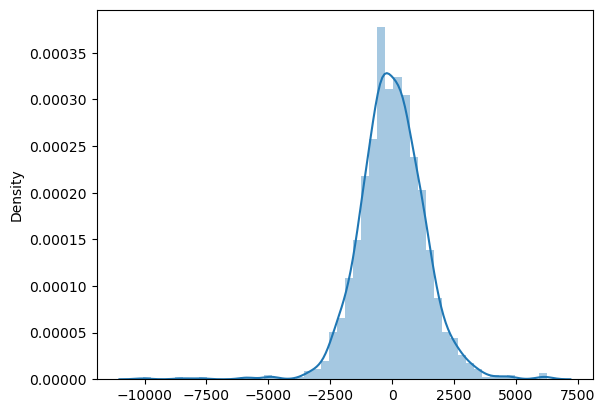

In [120]:
sns.distplot(model.resid)  # ploting error

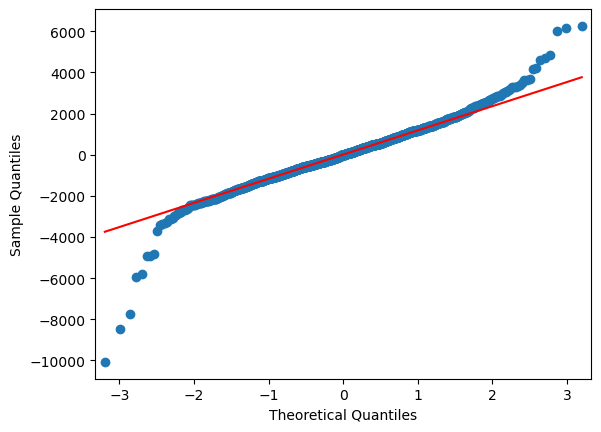

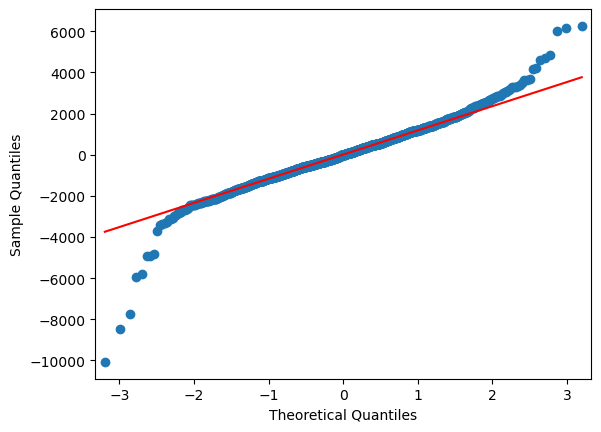

In [121]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')

In [122]:
list(np.where(model.resid>6000))

[array([109, 147, 523], dtype=int64)]

In [123]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

In [124]:
model_influence= model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([3.84096968e-03, 2.21400881e-03, 2.76898527e-03, ...,
       3.30158242e-06, 6.34382782e-04, 9.36041003e-03])

In [125]:
np.arange(len(data1))

array([   0,    1,    2, ..., 1433, 1434, 1435])

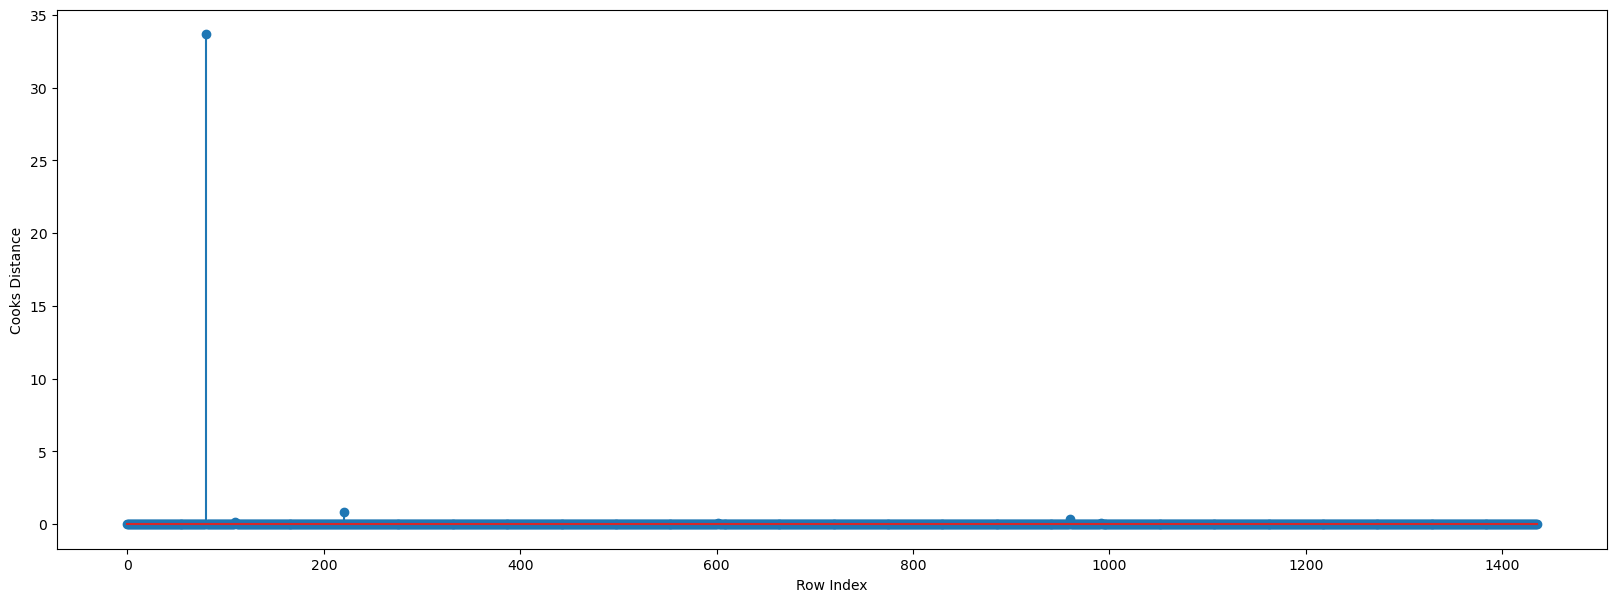

In [126]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance');

In [127]:
#Leverage value
k=data.shape[1]
n=data.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.02506963788300836

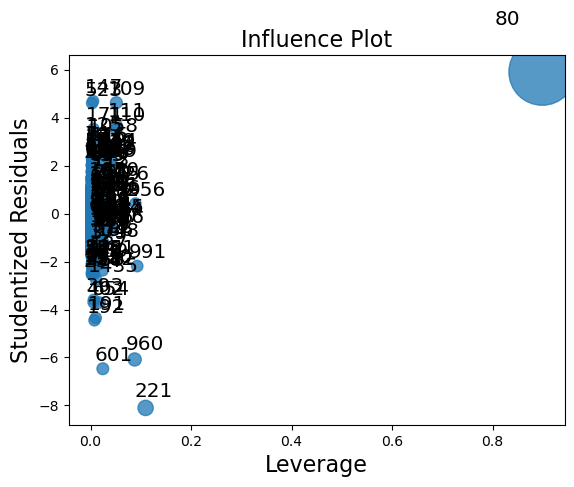

In [128]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [129]:
np.argmax(c) , np.max(c)

(80, 33.66414325437382)

## Model Deletion Diagnostics and Final Model

In [130]:
data2=data1.drop([80])
data2

,Price,Age,KM,FT,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [131]:
model1 = smf.ols("Price~Age+KM+Weight+HP+CC+Gears++Doors+Cylinders ", data = data2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1314.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        16:02:50   Log-Likelihood:                -12355.
No. Observations:                1435   AIC:                         2.473e+04
Df Residuals:                    1427   BIC:                         2.477e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -523.4939     78.707     -6.651      0.000    -677.888    -369.100
Age         -121.9311      2.586    -47.150      0.000    -127.004    -116.858
KM            -0.0171      0.001    -13.263      0.000      -0.020      -0.015
Weight        22.5820      1.063     21.244      0.000      20.497      24.667
HP            30.8135      2.618     11.772      0.000      25.679      35.948
CC            -1.6449      0.278     -5.917      0.000      -2.190      -1.100
Gears        596.2066    195.161      3.055      0.002     213.373     979.041
Doors        -35.2813     39.757     -0.887      0.375    -113.270      42.707
Cylinders  -2093.9757    314.828     -6.651      0.000   -2711.550   -1476.401
==============================================================================
Omnibus:                      350.596   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4557.686
Skew:                          -0.757   Prob(JB):                         0.00
Kurtosis:                      11.598   Cond. No.                     5.24e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.19e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [132]:
model_influence= model1.get_influence()
(c,_)=model_influence.cooks_distance
c

array([4.16249347e-03, 2.10171994e-03, 2.85789342e-03, ...,
       6.49210963e-07, 7.06900043e-04, 9.24500355e-03])

In [133]:
np.arange(len(data2))

array([   0,    1,    2, ..., 1432, 1433, 1434])

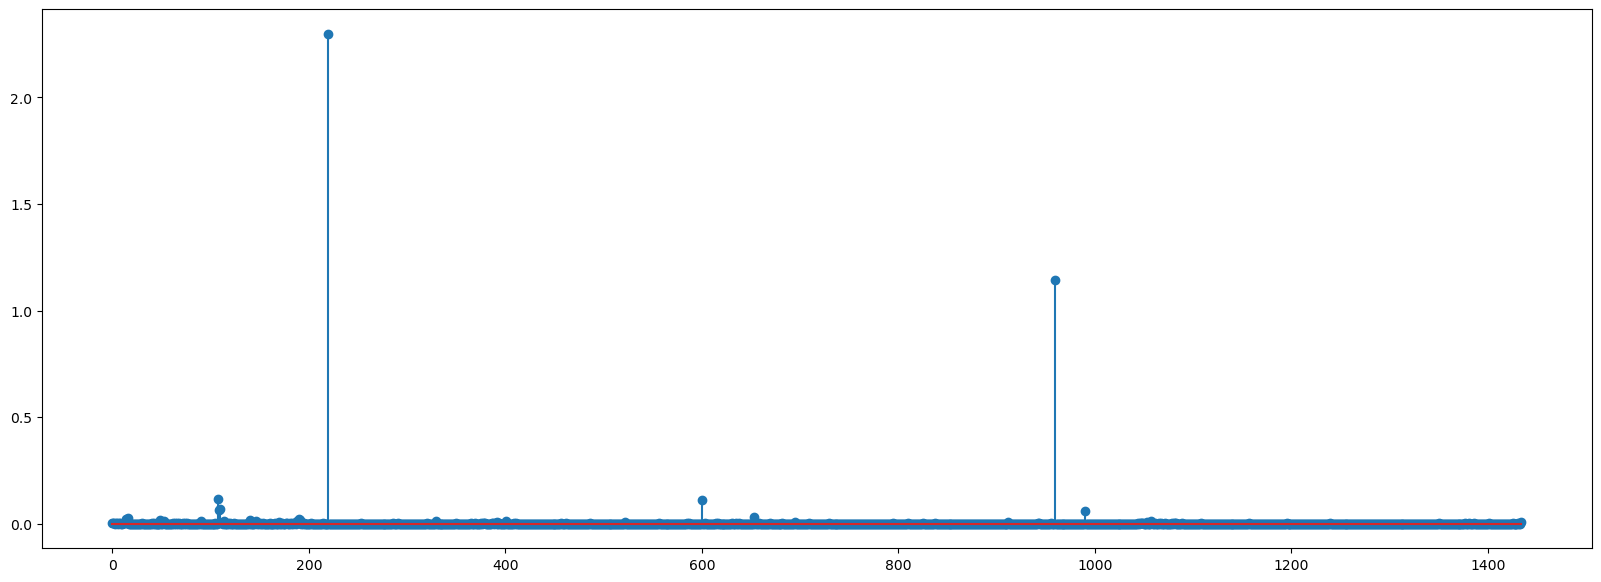

In [134]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c,5));

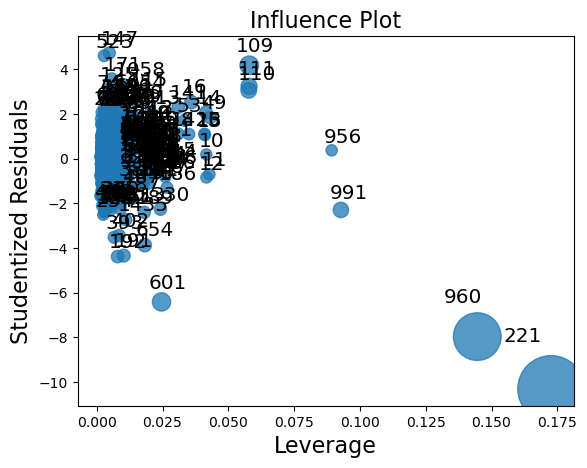

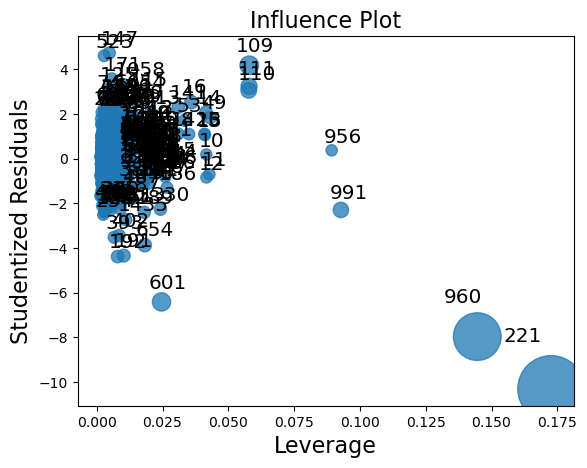

In [135]:
influence_plot(model1)

## checking the homoscedasticity


In [136]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

Text(0, 0.5, 'standarized residual values')

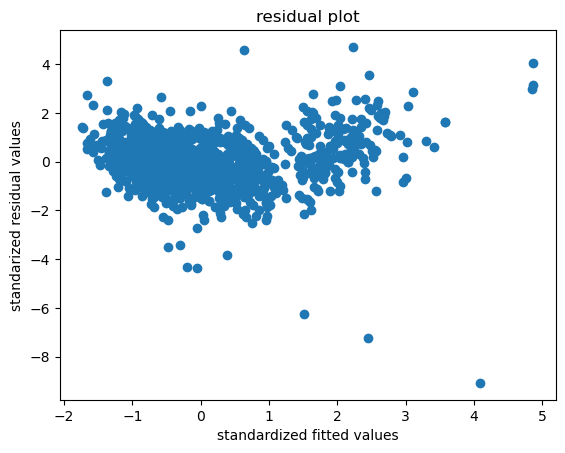

In [137]:
plt.scatter(get_standardized_values(model1.fittedvalues),get_standardized_values(model1.resid))
plt.title('residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standarized residual values')

### hence the plot error vs target have no pattern it satisfing the homoscedasticity assumption


In [138]:
import statsmodels.api as sm

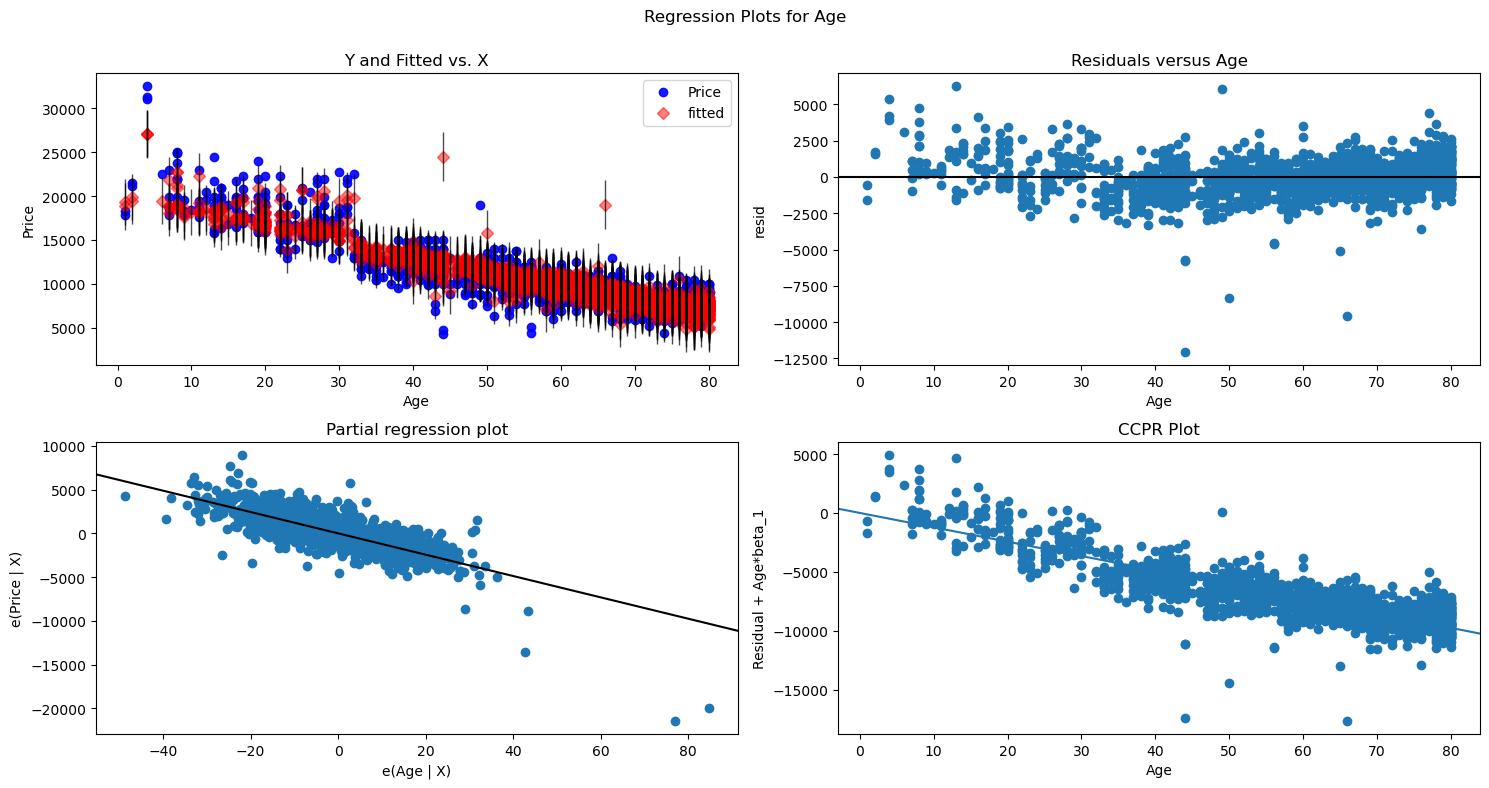

In [139]:
fig= plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,'Age',fig=fig)

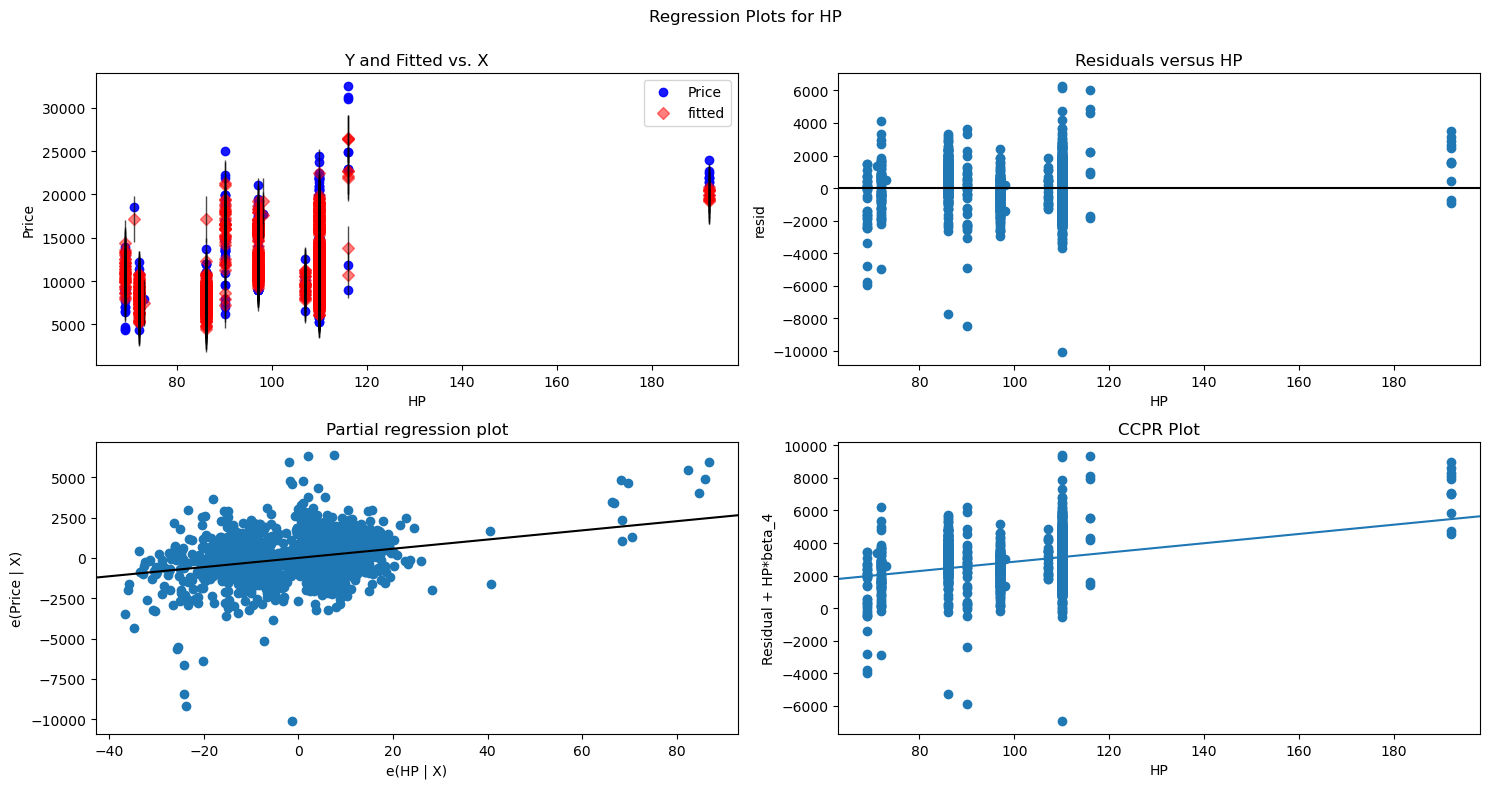

In [140]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

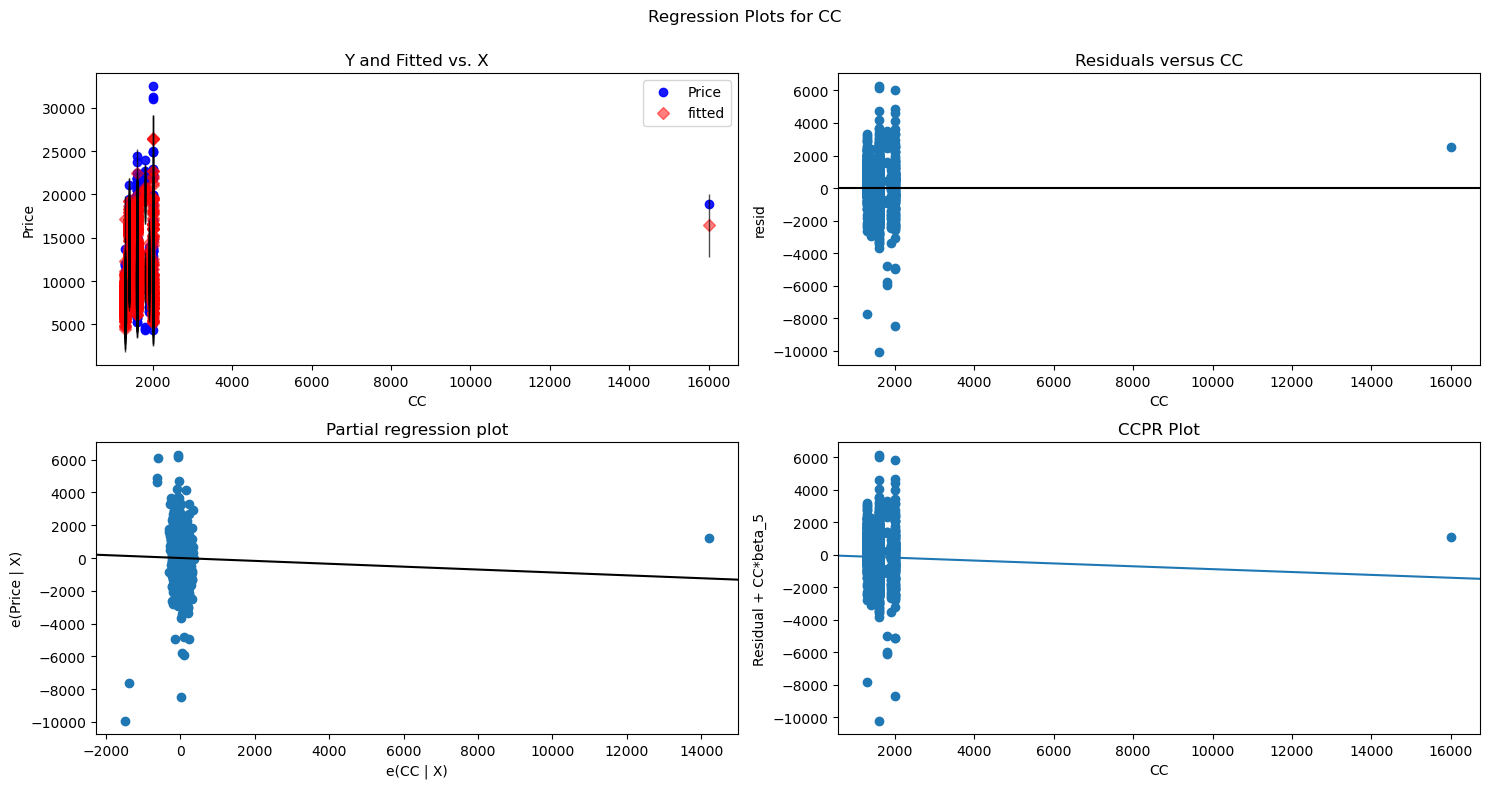

In [141]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

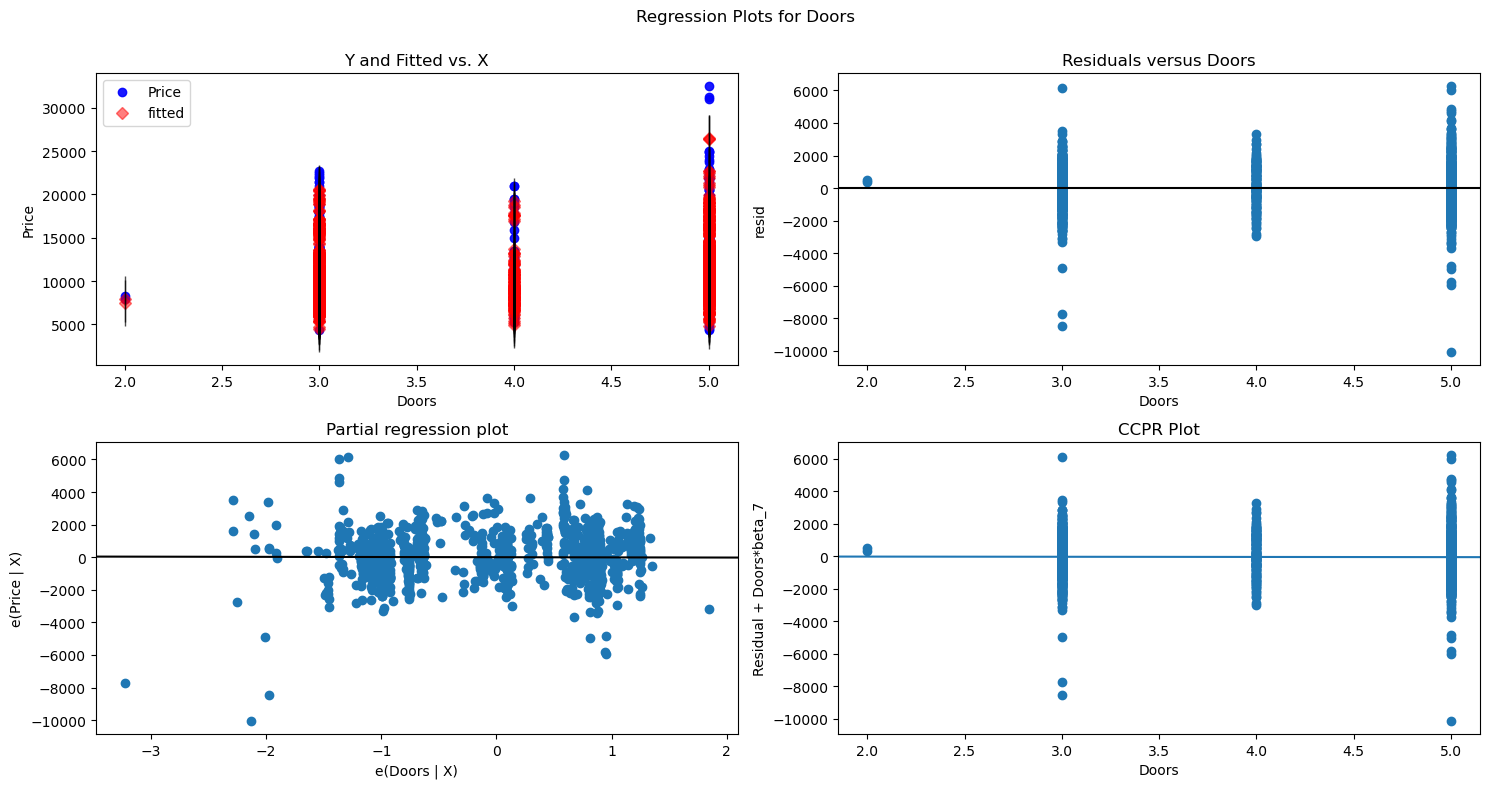

In [142]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

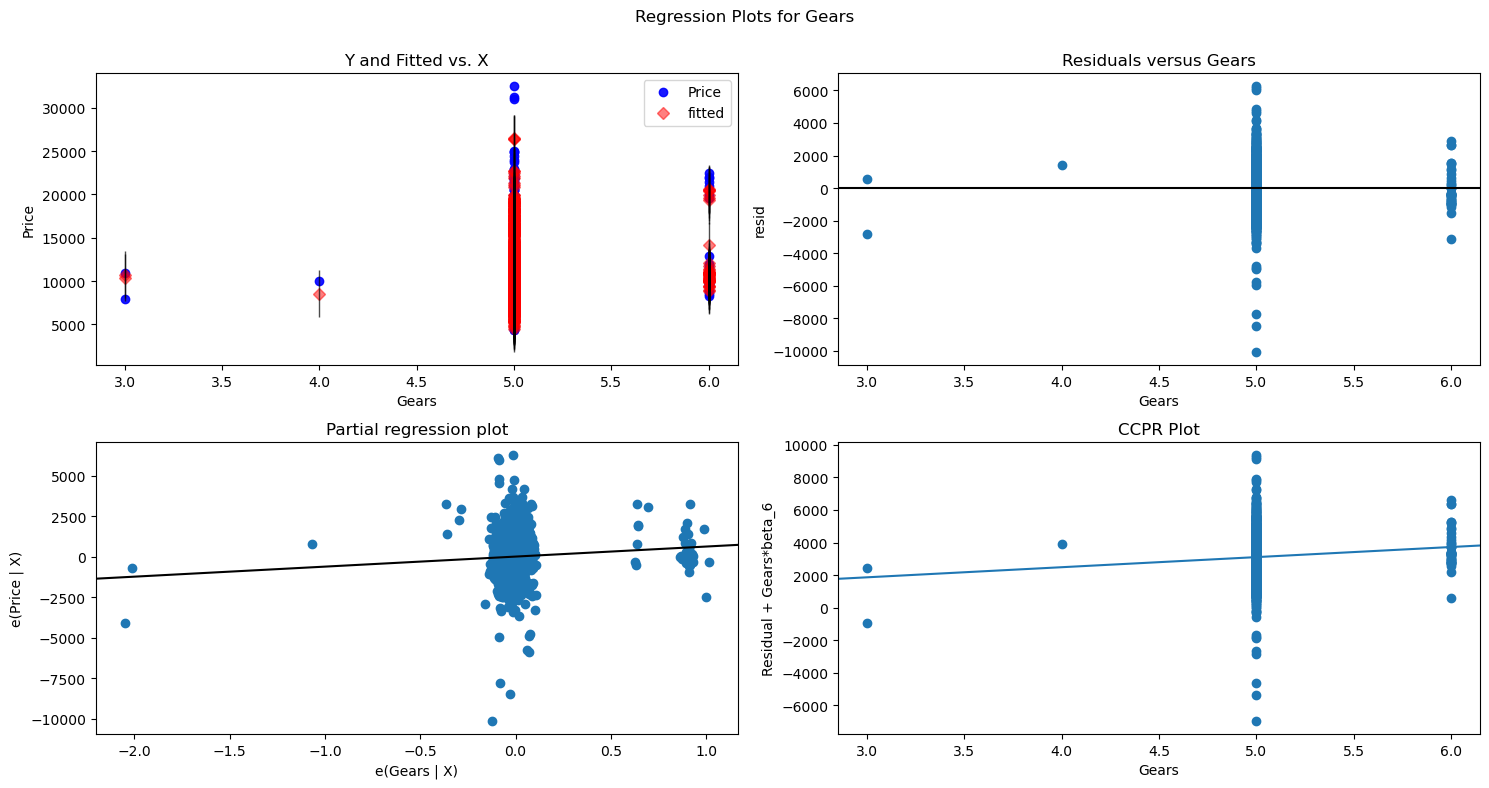

In [143]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()


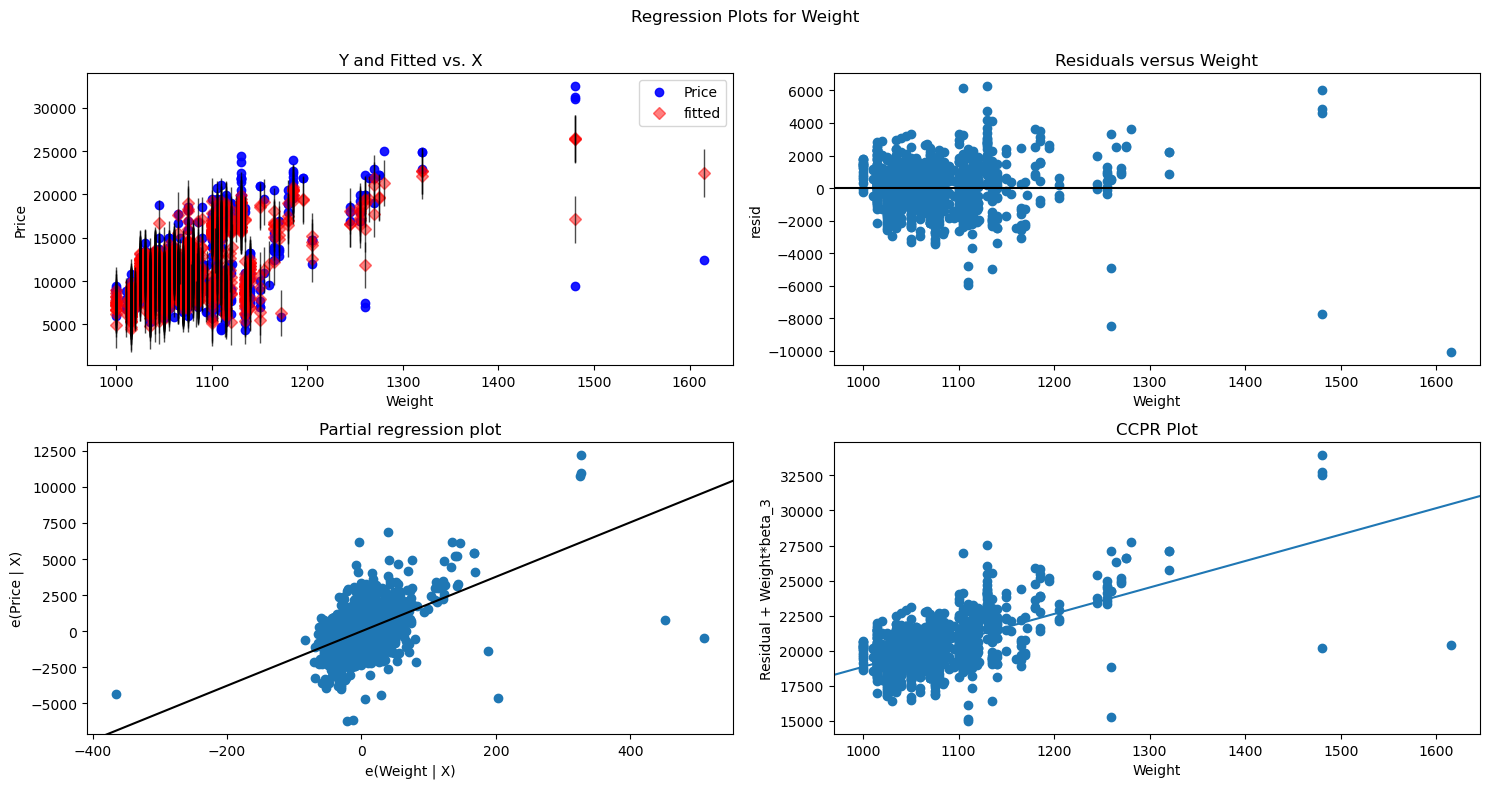

In [144]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [145]:
ypred=model1.predict(data1)
ypred

0       16159.348610
1       15715.569024
2       16127.623563
3       15776.215221
4       15563.857052
            ...     
1431     8869.374197
1432     8304.164655
1433     8460.023494
1434     8583.664664
1435    10552.450426
Length: 1436, dtype: float64

In [146]:
predicted = pd.DataFrame(data2)
predicted['Predicted_Price'] = ypred
predicted

,Price,Age,KM,FT,HP,Automatic,CC,Doors,Cylinders,Gears,Weight,Predicted_Price
0,13500,23,46986,1,90,0,2000,3,4,5,1165,16159.348610
1,13750,23,72937,1,90,0,2000,3,4,5,1165,15715.569024
2,13950,24,41711,1,90,0,2000,3,4,5,1165,16127.623563
3,14950,26,48000,1,90,0,2000,3,4,5,1165,15776.215221
4,13750,30,38500,1,90,0,2000,3,4,5,1170,15563.857052
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025,8869.374197
1432,10845,72,19000,2,86,0,1300,3,4,5,1015,8304.164655
1433,8500,71,17016,2,86,0,1300,3,4,5,1015,8460.023494
1434,7250,70,16916,2,86,0,1300,3,4,5,1015,8583.664664


## Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [147]:
X = data2.drop('Price',axis=1)
y = data2.Price
X

,Age,KM,FT,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,2,86,0,1300,3,4,5,1025
1432,72,19000,2,86,0,1300,3,4,5,1015
1433,71,17016,2,86,0,1300,3,4,5,1015
1434,70,16916,2,86,0,1300,3,4,5,1015


In [148]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1435, dtype: int64

In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)


In [151]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [152]:
LR.score(X_train,y_train)

0.8630339220729604

In [155]:
ypred1= LR.predict(X_test)
ypred1

array([12937.63644425,  7839.68579414, 10136.32571762, 17892.89990159,
       15681.44596734,  9959.08122183,  9889.68729399,  8852.75913638,
        9946.97456258,  9984.671892  ,  8167.27190044,  7625.34387215,
        8603.58680038, 11186.72395043,  8285.92160094,  7625.03746773,
        7618.48412311,  8082.17927985,  8438.32009965,  7699.2339062 ,
        9164.27528364,  7960.78617634,  7750.44561929, 11320.87921459,
        8457.82205789, 14779.88325368,  9732.84629919,  6845.65808498,
       16859.36061163,  7323.38834416,  7926.70986231,  6523.29290573,
       16912.64521261,  9794.12473717, 17650.18923137,  8325.36116641,
        9434.17120191,  7285.67192008,  8561.85598006, 10760.62899592,
       10278.16010416, 12066.3654    ,  8438.77746426, 10542.46813044,
        9970.01325954, 19986.21640862, 18128.88319875, 10427.4735431 ,
       11373.78593689,  8256.83684941,  7757.238188  ,  9195.02016711,
        7931.08345127, 13310.05281647,  9052.29879732,  7792.53256692,
      

In [154]:
print(LR.coef_, " ", LR.intercept_)

[-1.24211673e+02 -1.66785949e-02  8.16688179e+01  2.83352329e+01
  2.20483764e+02 -1.37036970e+00 -1.04326557e+01 -2.27373675e-13
  7.76944224e+02  2.12461175e+01]   -8723.667588492093


In [158]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error

r2_score = r2_score(y_test,ypred1)

mean_absolute_error = mean_absolute_error(y_test,ypred1)

mean_absolute_percentage_error = mean_absolute_percentage_error(y_test,ypred1)

print('r2_score: ',r2_score)

print('mean_absolute_error: ',mean_absolute_error)

print('mean_absolute_percentage_error: ',mean_absolute_percentage_error)

r2_score:  0.876623966790288
mean_absolute_error:  962.4766935885682
mean_absolute_percentage_error:  0.09317788780229487


##  now use the trained model to make predictions on new data

In [166]:
new_data = pd.DataFrame({"Age": [60], "KM": [60000],"FT":[1], "HP": [100], "Automatic":[1], "CC": [1600], "Doors": [4], "Cylinders":[4], "Gears": [5],"Weight": [1100]})
predicted_price = LR.predict(new_data)
print(f"Predicted Price: {predicted_price[0]:.2f} Euros")

Predicted Price: 10979.72 Euros


## .Apply Lasso and Ridge methods on the model.

## regularization 

In [168]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [187]:
ridgeReg = Ridge(alpha=0.05)

ridgeReg.fit(X_train,y_train)


Ridge(alpha=0.05)

In [188]:
ridgeReg.score(X_train,y_train)

0.8630339187218502

In [189]:
ypred2= ridgeReg.predict(X_test)
ypred2

array([12937.65839001,  7839.74067195, 10136.25048475, 17892.91092778,
       15681.52694899,  9959.12938286,  9889.79995516,  8852.81943297,
        9947.07736086,  9984.78287789,  8167.20802064,  7625.34075146,
        8603.61863615, 11186.78914992,  8285.96860832,  7625.09145505,
        7618.53775977,  8081.9559403 ,  8438.36589453,  7699.20078101,
        9164.39041128,  7960.90777625,  7750.58125696, 11320.89434689,
        8457.85793999, 14779.8587267 ,  9732.81024305,  6845.79959161,
       16859.43409666,  7323.52708777,  7926.69820354,  6523.3334974 ,
       16912.62557476,  9794.12977111, 17650.18352896,  8325.40427726,
        9434.21271129,  7285.73041752,  8561.90697315, 10760.76650091,
       10280.33694112, 12066.41803574,  8438.82300098, 10542.52993878,
        9970.12893021, 19985.38081362, 18128.88645585, 10427.53442881,
       11373.77307744,  8256.88707051,  7757.29131906,  9195.05679193,
        7931.2100013 , 13310.02941296,  9052.26860383,  7792.57769841,
      

In [197]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridgeReg, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_ridge_train = ridgeReg.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridgeReg.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.8463625449163785
R2_score (train):  0.8630339187218502
R2_score (test):  0.8766280383712411
RMSE:  1283.579105651507


In [198]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.5)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)

In [199]:
# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = lassoReg, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lasso_train = lassoReg.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lassoReg.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_ridge)

CV:  0.8463715932663073
R2_score (train):  0.8630324943338182
R2_score (test):  0.876609823202991
RMSE:  1283.6738587304214
